# Chapter 3: Unsupervised Learning and Customer Segmentation

From: https://www.amazon.com/Data-Science-Marketing-Analytics-practical/dp/1800560478 

Key concepts: 
-   Entities (customers, offers, etc)
-   Properties (age, income, etc)

Overall process:
1.  Chossing the relevant attributes for the entities
2.  Clustering/goruping the entities
3.  Understanding and describing the segments

#### Exercise 3.01: Mall customer segmentation - understanding the data

Get data from: https://packt.link/Dgl1z

In [6]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [7]:
# Import data
data0 = pd.read_csv("Mall_Customers.csv")
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# Show dataframe information
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   200 non-null    int64 
 1   Gender       200 non-null    object
 2   Age          200 non-null    int64 
 3   Income       200 non-null    int64 
 4   Spend_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Rename columns
data0.rename(
    {'Annual Income (k$)':'Income', 
     'Spending Score (1-100)':'Spend_score'}, 
     axis=1, 
     inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Get main stats
data0.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Approaches to segmentation:
-   Traditional:
    -   Rough groupings based on intuitions and arbitrary thresholds
    -   Unsupervised Learning (Clustering) for Customer Segmentation
        -   Choosing Relevant Attributes (Segmentation Criteria)
        -   Standardizing Data

### Exercise 3.02 (Rough groupings): Traditional Segmentation of Mall Customers

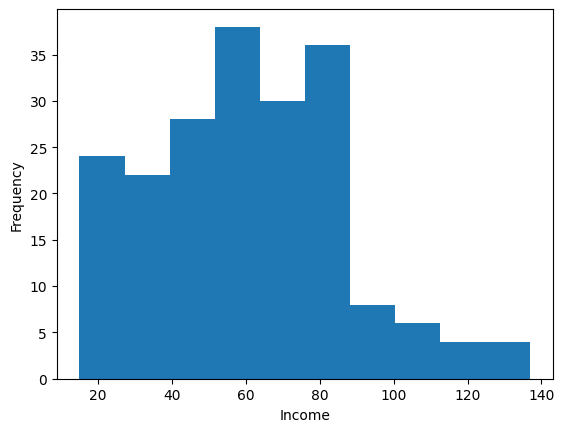

In [13]:
data0.Income.plot.hist()
plt.xlabel('Income')
plt.show()

In [15]:
# Create cluster variable
data0['Cluster'] = np.where(
    data0.Income >= 90, 'High earners', 
    np.where(data0.Income < 50, 
    'Low Income', 'Moderate Income'))

# Get stats over clusters
data0.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


### Exercise 3.03 (Unsupervised Learning): Standardizing Customer Data

In [18]:
# Import scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
# Select columns to scale and copy dataframe
cols_to_scale = ['Age', 'Income', 'Spend_score']
data_scaled = data0.copy()

In [20]:
# Scale data
data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

In [21]:
# Check main stats after scalling
data_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


### Exercise 3.04 (Unsupervised Learning): Calculating the Distance between Customers

In [27]:
# Select columns to get distance 
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [31]:
# Calculate distance between customers
from scipy.spatial.distance import cdist
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [32]:
# Check distance
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

np.float64(1.6305)

### Exercise 3.05 (Unsupervised Learning): K-Means Clustering on Mall Customers

In [33]:
# Select columns for clustering cols
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


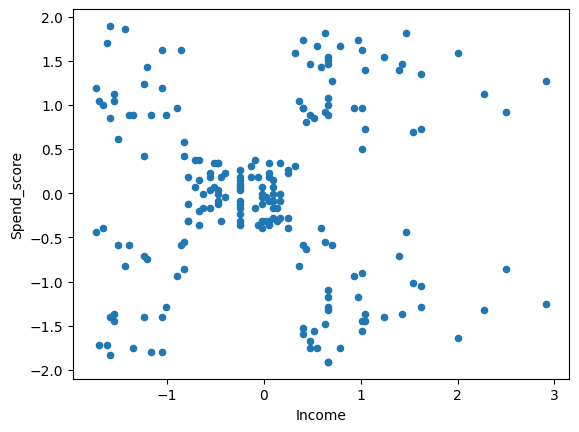

In [36]:
# Plot observations
data_scaled.plot.scatter(x='Income', y='Spend_score')
plt.show()

In [38]:
# Import KMeans from sklearn.cluster. Create an instance of the KMeans
# model specifying 5 clusters (n_clusters) and 42 for random_state
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)